![alt text](https://github.com/callysto/callysto-sample-notebooks/blob/master/notebooks/images/Callysto_Notebook-Banner_Top_06.06.18.jpg?raw=true)  


<h1 align='center'>Environment Canada Weather Data Notebook Demo</h1>

<h4 align='center'>Adapted from Laura Gutierrez Funderburk $\mid$ Data Exploration $\mid$ Canada Historical Climate Data</h4>

<h3 align='center'>Download data by province and get station numbers</h3>

In this first part of the notebook, we will download data from http://climate.weather.gc.ca/historical_data/search_historic_data_e.html. 
The set of functions is predefined in **notebook_code** directory **weather.py** file.

First we will call **download_raw_data()** function, giving it province name and start year, it will download raw html.

Second we call **generate_pandas_dataframe_from_html()** function, giving it raw html (result from previous function), it will convert it to dataframe extracting Station Numbers and frequency with which the data was collected. 

Let us take the province Ontario, start year 2011 and download stations metadata.

In [1]:
## Install missing python libraries
!pip install fuzzywuzzy --user
!pip install python-Levenshtein --user
!pip install tqdm --user

In [2]:
# Import helper functions
from notebook_code.weather import *
import warnings
warnings.simplefilter("ignore")

In [3]:
# Specify Parameters
province = "ON"      # Which province to parse?
start_year = "2011"  # Looking for stations with data available between 2011 and 2019. 

We download raw html pages


In [4]:
# Use download_raw_data() function to download raw html
html_frames = download_raw_data(province,start_year)

We convert the html pages into DataFrames. A **DataFrame** is a commonly encountered way to work with data. It can be thought of as a 2D data structure that makes it easy to work with the data at hand.

In [5]:
# Use generate_pandas_dataframe_from_html to convert html into dataframe
stations_df = generate_pandas_dataframe_from_html(html_frames)

We preview the first five entries. In the table below you can see five columns: the StationsID will be the key part to accessing full data sets. The Name contains city names found under ON, the Intervals column states the frequency with which the data was updated, while Year Start and Year end state the years between which the data was collected.
This result should be equivalent to this [web-page](http://climate.weather.gc.ca/historical_data/search_historic_data_stations_e.html?searchType=stnProv&timeframe=1&lstProvince=ON&optLimit=yearRange&StartYear=2011&EndYear=2019&Year=2019&Month=2&Day=14&selRowPerPage=100)

In [6]:
# Preview first 5 rows, you can add number in parentheses and view more row: for example head(10)
stations_df.head()

,StationID,Name,Intervals,Year Start,Year End
0,42967,ALGONQUIN PARK EAST GATE,"[Hourly, Daily, Monthly]",2004,2019
1,4607,AMHERSTBURG,"[Daily, Monthly]",1988,2019
2,6901,APPLETON,"[Daily, Monthly]",1992,2019
3,3987,ARMSTRONG (AUT),"[Hourly, Daily, Monthly]",1953,2019
4,52900,ARMSTRONG A,"[Hourly, Daily]",2015,2019


Let's now pick only those entries that belong to Toronto. Note that the function will pick up every station containing word "Toronto"

In [8]:
# Select subset of the data from a specific location and preview the result
Toronto_data = get_weather_data_by_loc(stations_df,location_name="Toronto")
Toronto_data

,StationID,Name,Intervals,Year Start,Year End
203,52641,PA SCARBOROUGH TORONTO HUNT,[Hourly],2014,2015
205,52640,PA TORONTO HYUNDAI,[Hourly],2014,2015
206,52731,PA TORONTO INTERNATIONAL TRAP AND SKEET,[Hourly],2014,2015
207,52678,PA TORONTO NORTH YORK MOTORS,[Hourly],2014,2015
307,5051,TORONTO,"[Hourly, Daily, Monthly]",1953,1969
308,53678,TORONTO BUTTONVILLE A,"[Hourly, Daily]",2015,2019
309,4841,TORONTO BUTTONVILLE A,"[Hourly, Daily, Monthly]",1986,2015
310,54239,TORONTO BUTTONVILLE A,"[Hourly, Daily]",2016,2019
311,31688,TORONTO CITY,"[Hourly, Daily, Monthly]",2002,2019
312,48549,TORONTO CITY CENTRE,"[Hourly, Daily]",2009,2019


### Exercise: 
Try extracting rows for other city, replace ?? with the city name (we have only data from Ontario):

In [ ]:
#Note that if the result is empty - it means no data is found
other_city_data = get_weather_data_by_loc(stations_df,location_name="??")
other_city_data

<h3 align='center'>Download temperature data by Station</h3>

In the second  part of the notebook, we will download hourly temperatures data using StationID we got in the first part. 
  
For Toronto there are several stations collecting data, we will choose station **TORONTO CITY CENTRE - 48549** 
  
First we will call **download_data_date_range()** giving it StationID and dates range in  format "mmmYYYY". We will collect and compare data for 3 winters  - 2016, 2017 and 2018. 
  
Then we will use **matplotlib** to plot the results. 

In [9]:
## Use download_data_date_range() function to collect hourly temperaure from Dec2015 to Feb2016
winter_2016 = download_data_date_range(48549,"Dec2015","Feb2016")
winter_2017 = download_data_date_range(48549,"Dec2016","Feb2017")
winter_2018 = download_data_date_range(48549,"Dec2017","Feb2018")

In [10]:
## Preview first 5 rows for winder2016: we are interested only in  Date/Time and Temp (°C) columns
winter_2016.head()

,Date/Time,Year,Month,Day,Time,Temp (°C),Temp Flag,Dew Point Temp (°C),Dew Point Temp Flag,Rel Hum (%),...,Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
0,2015-12-01 00:00:00,2015,12,1,00:00,2.3,NaN,0.2,NaN,86.0,...,NaN,16.1,NaN,101.35,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-12-01 01:00:00,2015,12,1,01:00,3.1,NaN,1.5,NaN,89.0,...,NaN,16.1,NaN,101.27,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-12-01 02:00:00,2015,12,1,02:00,3.4,NaN,2.2,NaN,92.0,...,NaN,16.1,NaN,101.20,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-12-01 03:00:00,2015,12,1,03:00,3.9,NaN,3.6,NaN,98.0,...,NaN,16.1,NaN,101.17,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-12-01 04:00:00,2015,12,1,04:00,3.9,NaN,3.8,NaN,99.0,...,NaN,16.1,NaN,100.98,NaN,NaN,NaN,NaN,NaN,NaN


### Exercise
Try downloading data for summer 2015  for the same station:

In [11]:
#replace ?? with  months  names - starting month and end month
summer_2015 = download_data_date_range(48549,"??","??")

INVALID INPUT. ENTER AN INTEGER FOR stationID, A STRING FOLLOWING THE FORMAT MonYEAR, i.e. Jun2015


In [ ]:
## Check yourself: preview first 5 rows for summer_2015
summer_2015.head()

Now we will use **matplotlib** library to plot this data. 

In [12]:
## Define matplotlib parameteres
%matplotlib inline  
sns.set_style('whitegrid')

We will plot winter 2016 temperatures first:

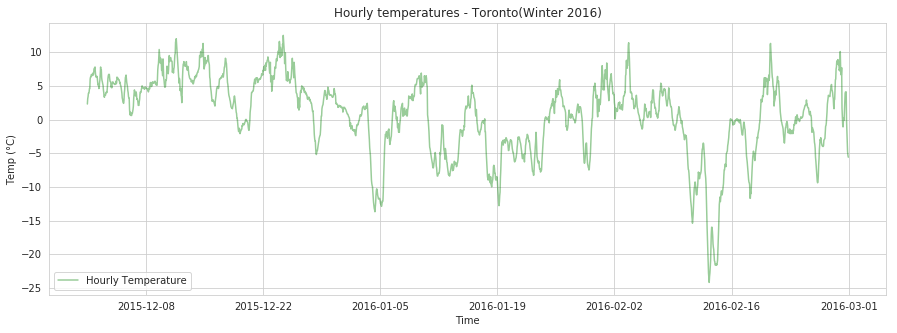

In [13]:
fig = plt.figure(figsize=(15,5))                                   # set matplotlib figure size
# Plot two columns: Date/Time and Temp using color green - "g"
plt.plot(winter_2016['Date/Time'], winter_2016['Temp (°C)'],"g", label='Hourly Temperature',alpha=0.4) #alpha=0.4 - transparency
plt.title("Hourly temperatures - Toronto(Winter 2016)")             # plot title
plt.ylabel('Temp (°C)')                                            # y axis label
plt.xlabel('Time')                                                 # x axis label
plt.legend()                                                       # show the legend
plt.show()                                                         # display the plot

Now we create exactly the same plot + add daily average:

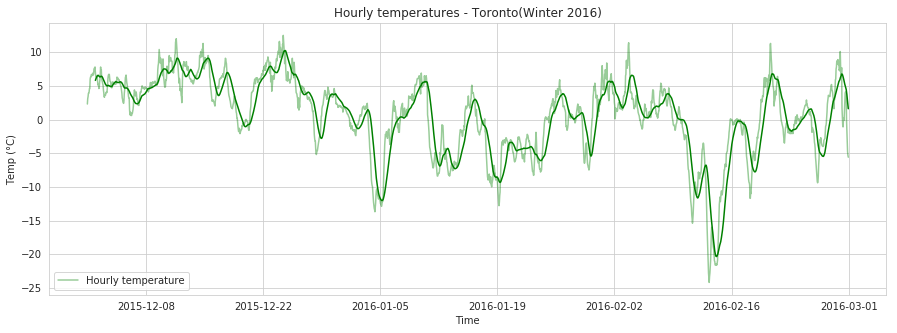

In [14]:
fig = plt.figure(figsize=(15,5))
plt.plot(winter_2016['Date/Time'], winter_2016['Temp (°C)'],"g", label='Hourly temperature',alpha=0.4) 
plt.title("Hourly temperatures - Toronto(Winter 2016)")
plt.ylabel('Temp (°C)')
plt.xlabel('Time')
plt.legend()

## This is a new line calculating averages every 24 poins(hours)
plt.plot(winter_2016['Date/Time'], winter_2016['Temp (°C)'].rolling(window=24,center=False).mean(),'g', label='Average daily temperature')

plt.show()

### Exercise: 
Try plotting weather from another dataset(winter2017 or summer2015)

In [ ]:
## your code here

Now we will plot and compare all 3 winters, we will draw vertical lines to visualy distinguish between 3 winter months.

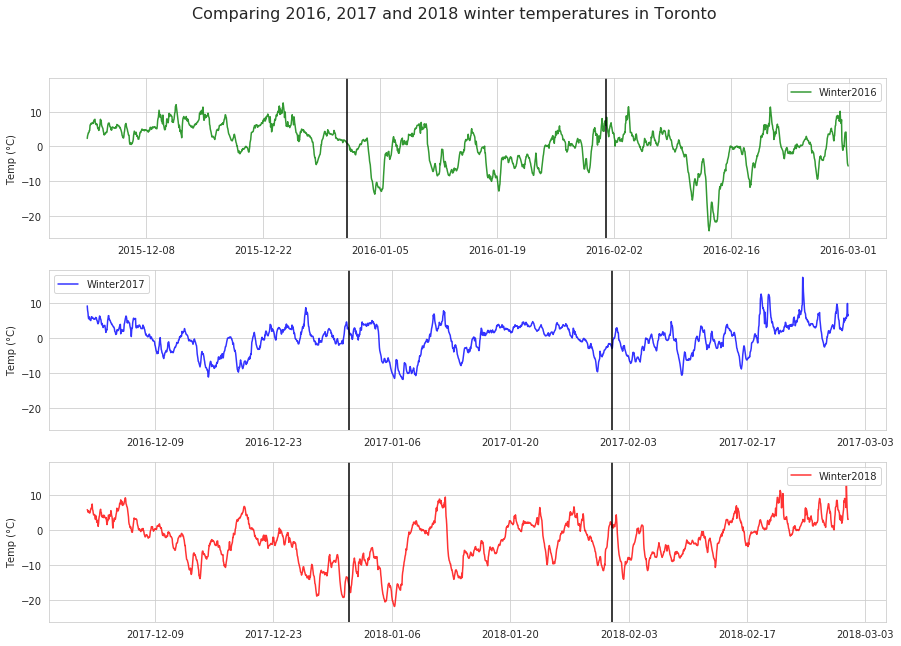

In [15]:
fig = plt.figure(figsize=(15,10))
fig.suptitle("Comparing 2016, 2017 and 2018 winter temperatures in Toronto",fontsize=16)

### Set up a plot with subplots (rows, columns, active plot)
ax1 = plt.subplot(311)
plt.plot(winter_2016['Date/Time'], winter_2016['Temp (°C)'],'g', alpha=0.8,label='Winter2016')
plt.axvline(datetime(2016, 1, 1),color='k')      # January 1st vertical line
plt.axvline(datetime(2016, 2, 1),color='k')      # February 1st vertical line
plt.ylabel('Temp (°C)')
plt.legend()

ax2 = plt.subplot(312, sharey=ax1)
plt.plot(winter_2017['Date/Time'], winter_2017['Temp (°C)'],'b', alpha=0.8,label='Winter2017')
plt.axvline(datetime(2017, 1, 1),color='k')      # January 1st vertical line
plt.axvline(datetime(2017, 2, 1),color='k')      # February 1st vertical line
plt.ylabel('Temp (°C)')
plt.legend()

ax3 = plt.subplot(313, sharey=ax1)
plt.plot(winter_2018['Date/Time'], winter_2018['Temp (°C)'],'r', alpha=0.8,label='Winter2018')
plt.axvline(datetime(2018, 1, 1),color='k')       # January 1st vertical line
plt.axvline(datetime(2018, 2, 1),color='k')       # February 1st vertical line
plt.ylabel('Temp (°C)')
plt.legend()

plt.show()

We see that the coldest Christmas was last year  (up to -20°) - and the warmest in 2016 - spike of temperature up to +12°. There was the coldest February in 2016 - up to -25°.

<h2 align='center'>Conclusion</h2>

In this notebook we explored  ways working with open data. - historical weather data.

We first pulled raw html pages and then converted them in a tabular form using pandas dataframes.   
We got station id for specific city and pulled hourly data for this location.

We explored plotting data using matplotlib (hourly and daily averages).
We plotted data for 3 winters and compared them.


![alt text](https://github.com/callysto/callysto-sample-notebooks/blob/master/notebooks/images/Callysto_Notebook-Banners_Bottom_06.06.18.jpg?raw=true)